In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_cc = pd.read_csv("C:\\Users\\SARVESH SURVE\\Downloads\\CC GENERAL.csv")

# 1.EDA

In [3]:
df_cc.shape

(8950, 18)

In [4]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Unique values in each column
df_cc.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [6]:
# Dataset Statistical Description
df_cc.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
#droping CUST_ID column
df_cc =df_cc.drop(['CUST_ID'],axis=1)

In [8]:
df_cc.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [9]:
df_cc.duplicated().sum()

0

In [10]:
# Null values in the Dataset
df_cc.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CASH_ADVANCE_FREQUENCY                0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
TENURE                                0
dtype: int64

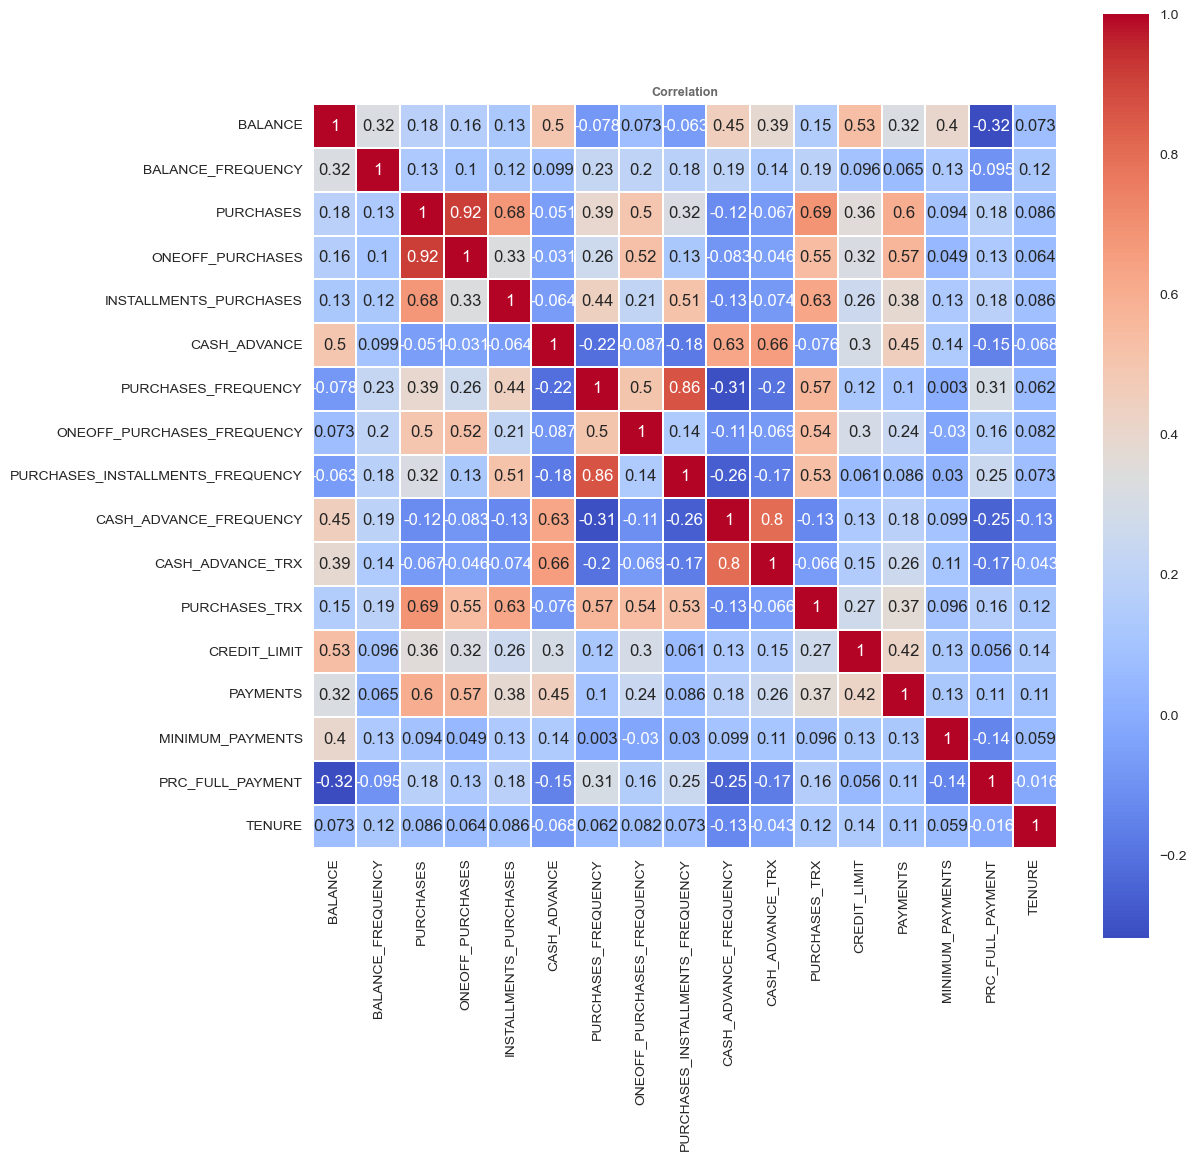

In [11]:
# Correlation between columns
plt.figure(figsize=(12,12)) 
sns.heatmap(data=df_cc.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);
plt.title('Correlation', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.show();

# Detection of outliers

In [12]:
for i in df_cc:
    Q1 = df_cc[i].quantile(0.25)
    Q3 = df_cc[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df_cc[(df_cc[i] > up) | (df_cc[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

BALANCE yes
BALANCE_FREQUENCY yes
PURCHASES yes
ONEOFF_PURCHASES yes
INSTALLMENTS_PURCHASES yes
CASH_ADVANCE yes
PURCHASES_FREQUENCY no
ONEOFF_PURCHASES_FREQUENCY yes
PURCHASES_INSTALLMENTS_FREQUENCY no
CASH_ADVANCE_FREQUENCY yes
CASH_ADVANCE_TRX yes
PURCHASES_TRX yes
CREDIT_LIMIT yes
PAYMENTS yes
MINIMUM_PAYMENTS yes
PRC_FULL_PAYMENT yes
TENURE yes


In [13]:
#There are outliers in other variables except PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY lets fix them:
for i in df_cc:
    Q1 = df_cc[i].quantile(0.25)
    Q3 = df_cc[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df_cc.loc[df_cc[i] > up_lim,i] = up_lim
    df_cc.loc[df_cc[i] < low_lim,i] = low_lim

In [14]:
#Outlier Query
for i in df_cc:
    Q1 = df_cc[i].quantile(0.25)
    Q3 = df_cc[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df_cc[(df_cc[i] > up) | (df_cc[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

BALANCE no
BALANCE_FREQUENCY no
PURCHASES no
ONEOFF_PURCHASES no
INSTALLMENTS_PURCHASES no
CASH_ADVANCE no
PURCHASES_FREQUENCY no
ONEOFF_PURCHASES_FREQUENCY no
PURCHASES_INSTALLMENTS_FREQUENCY no
CASH_ADVANCE_FREQUENCY no
CASH_ADVANCE_TRX no
PURCHASES_TRX no
CREDIT_LIMIT no
PAYMENTS no
MINIMUM_PAYMENTS no
PRC_FULL_PAYMENT no
TENURE no


* We have eliminated outliers.We followed this path;We have replaced the values ​​below the lower limit with the lower limit, and the values above the upper limit with the upper limit....

In [15]:
# Listing numeric columns
v_n = list(df_cc.select_dtypes(include=['float64', 'int64']).columns)

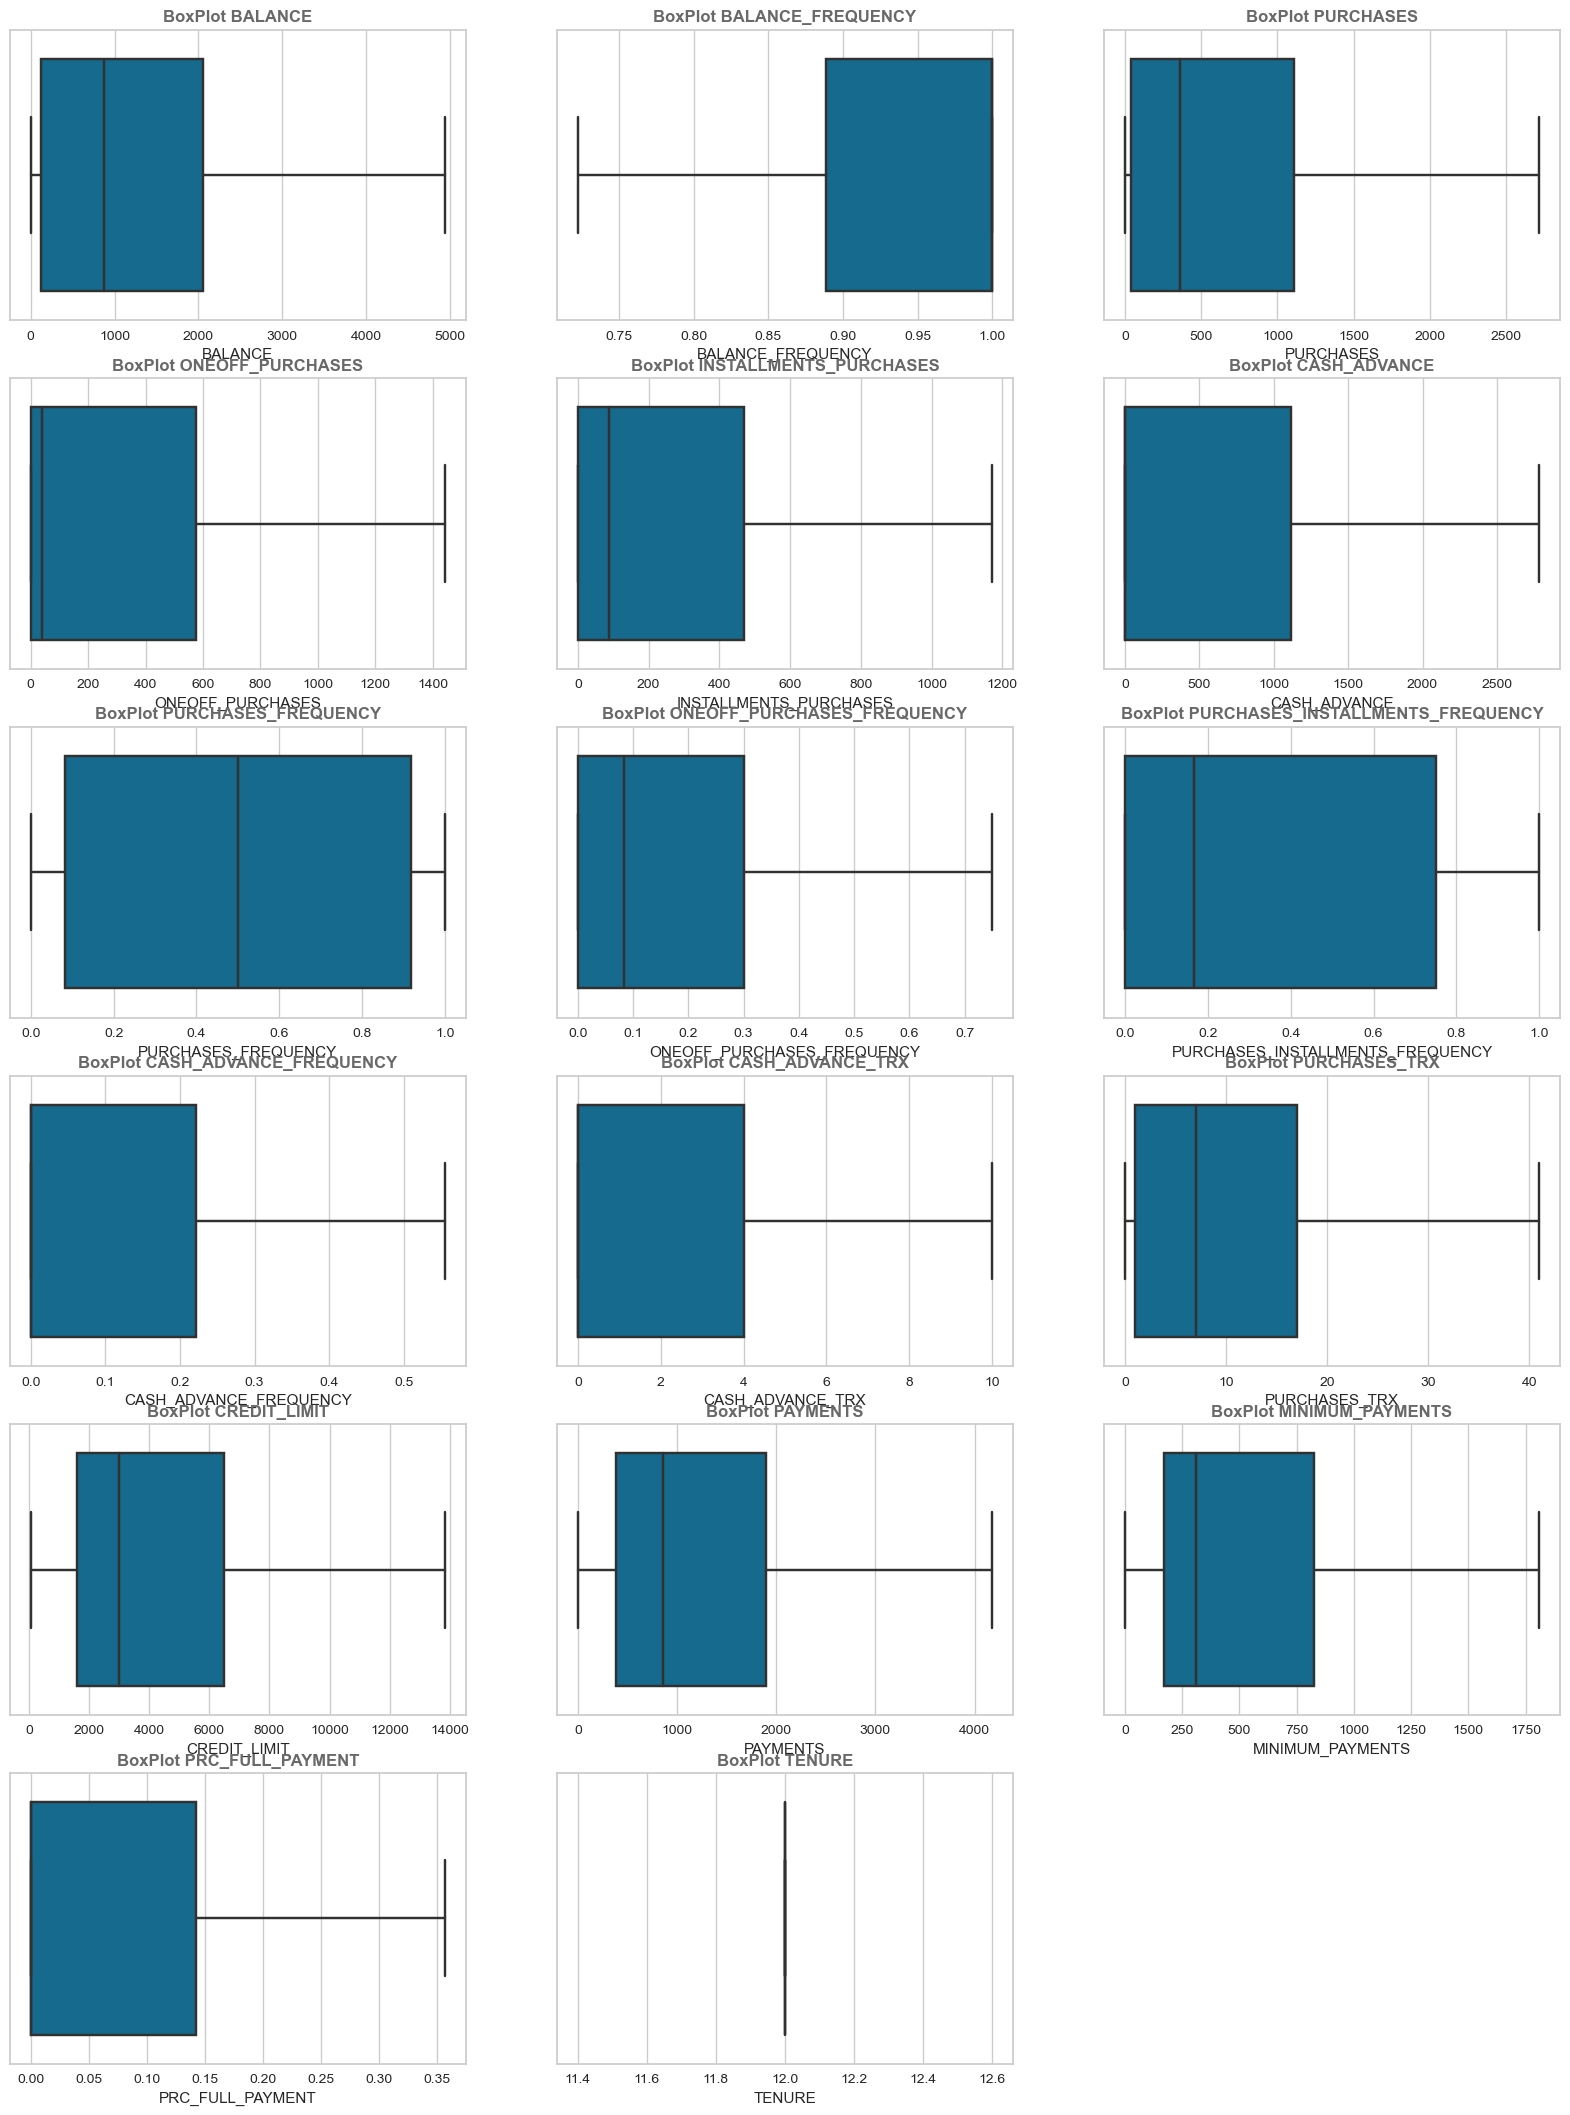

In [16]:
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.boxplot(df_cc[column])
    plt.title('BoxPlot {}'.format(column), fontsize=12, color ='dimgrey', fontweight = 'bold')
    x += 1

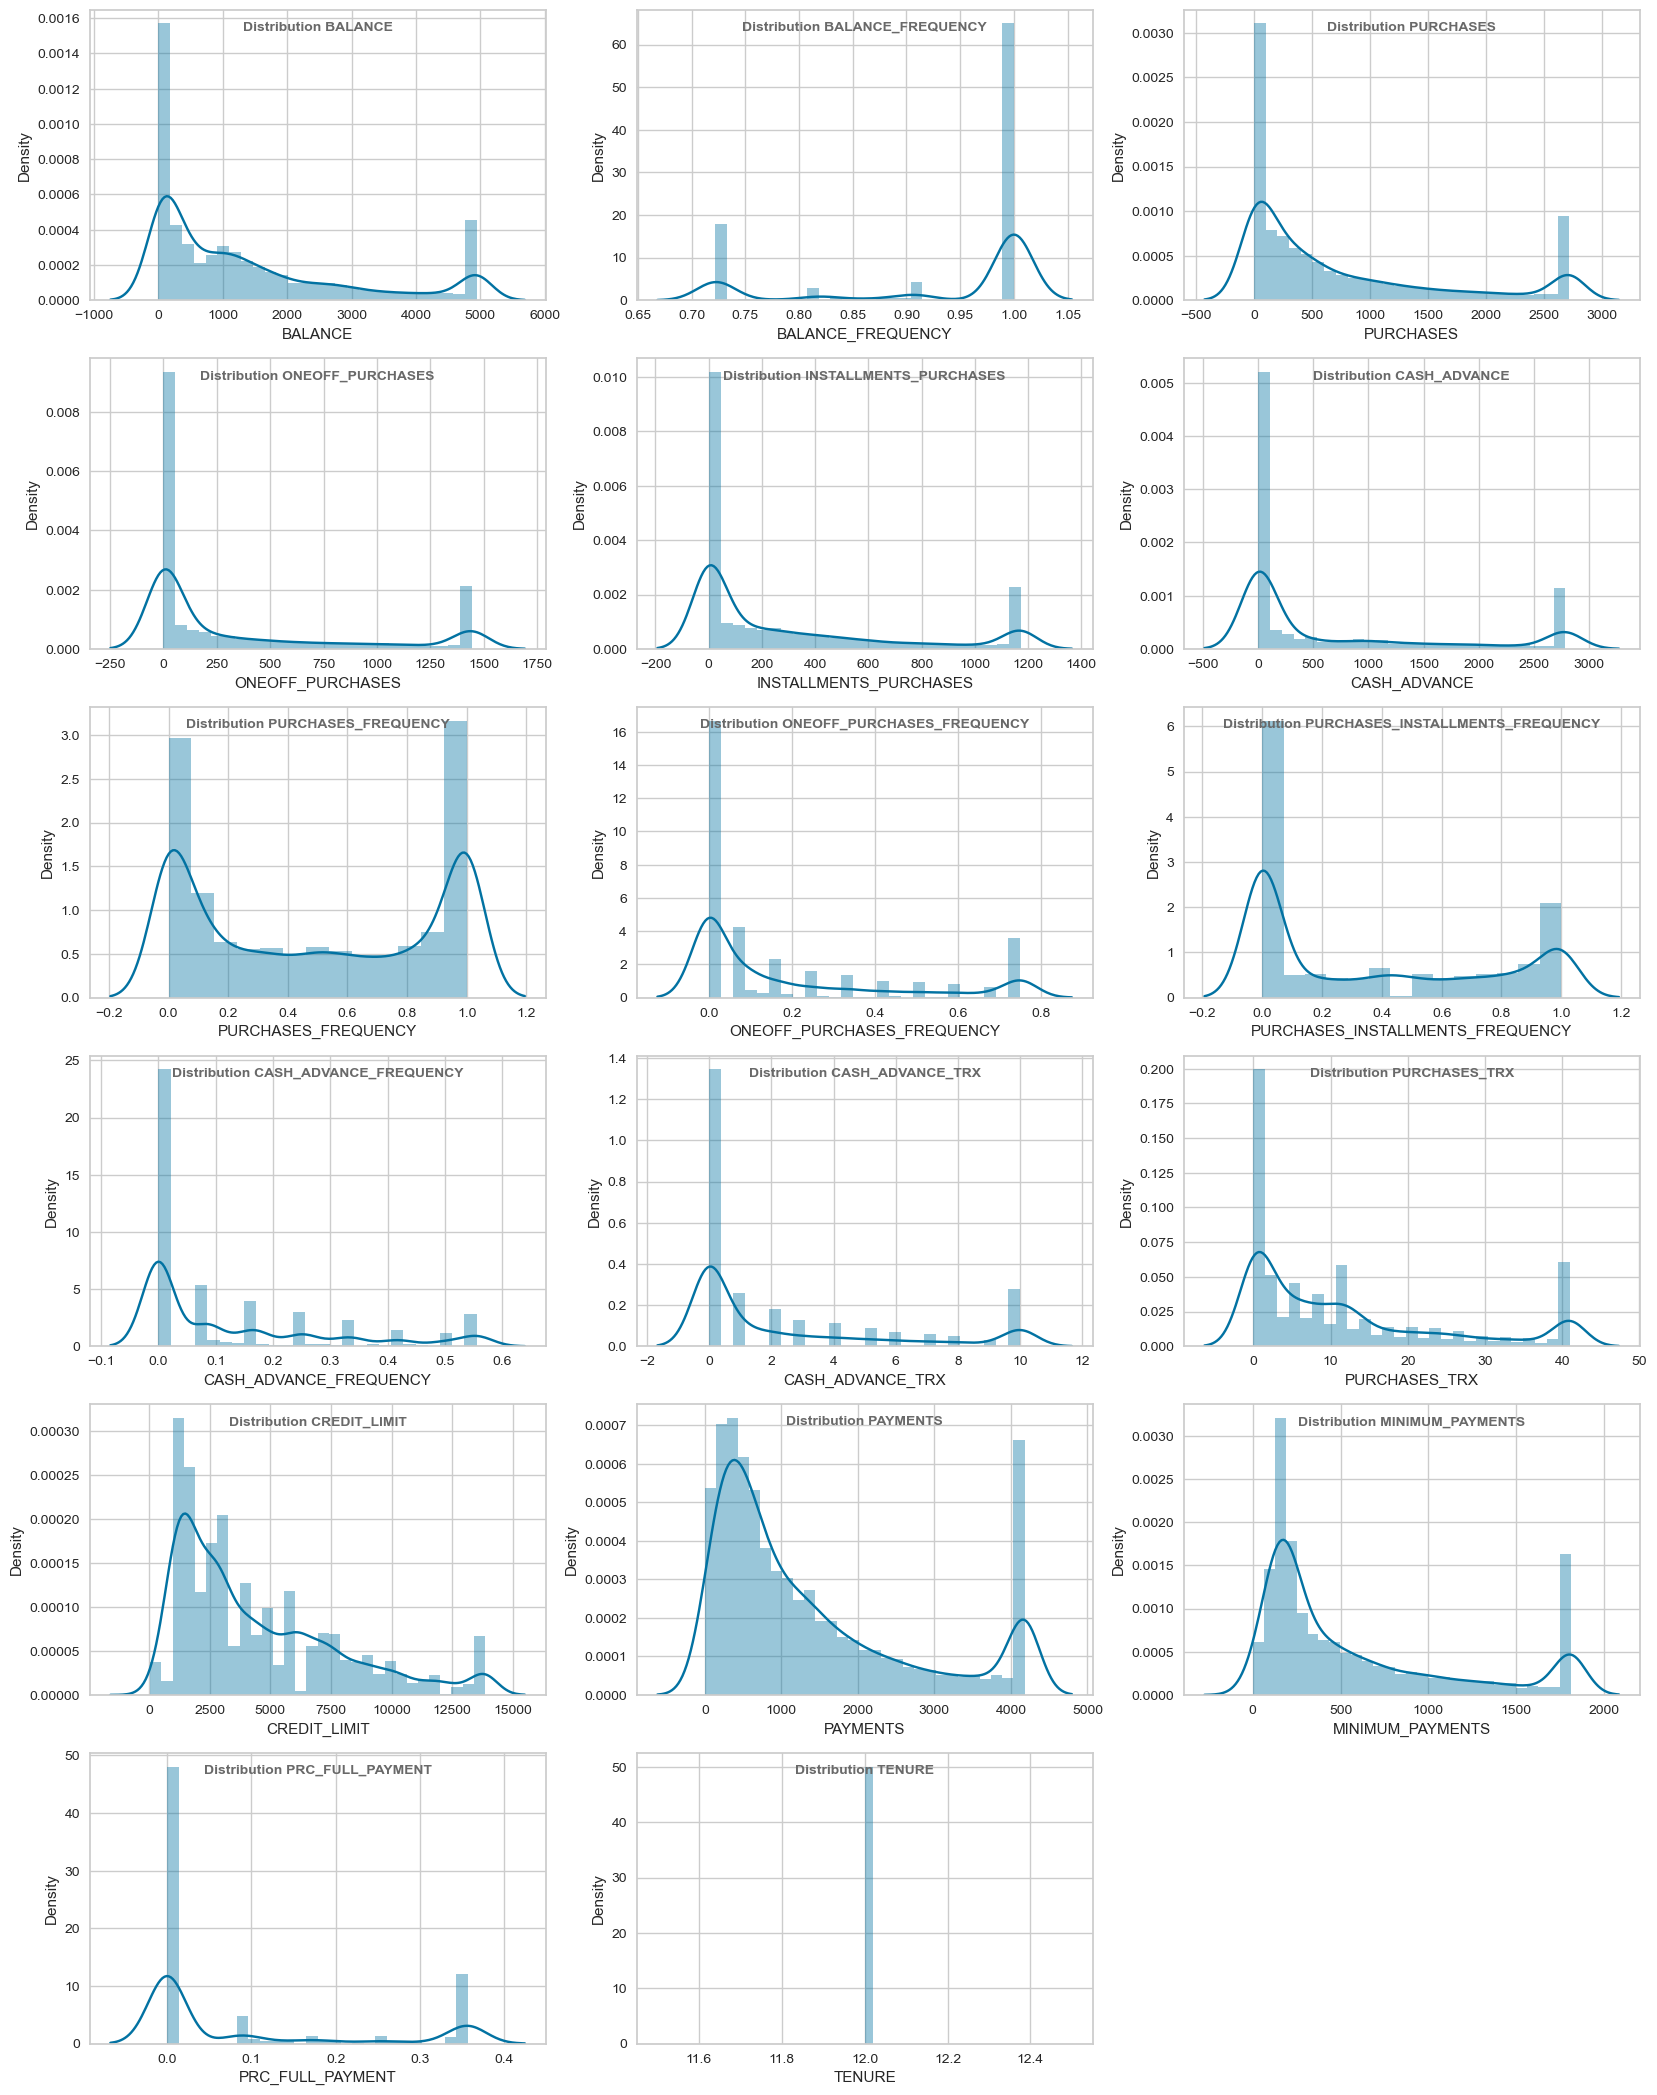

In [17]:
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.distplot(df_cc[column])
    plt.title('Distribution {}'.format(column), fontsize=10, color ='dimgrey', fontweight = 'bold', y=0.90)
    x += 1

# 2. Pre-processing

As previously verified, CREDIT_LIMIT has only one null value, so we can exclude this single null value without any problems.

In [18]:
df_cc.dropna(subset=['CREDIT_LIMIT'],inplace=True)

In the MINIMUM_PAYMENTS column, 313 null values were found. In this case, it is more pertinent to replace these values with the median

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
df_cc.MINIMUM_PAYMENTS = imputer.fit_transform(df_cc['MINIMUM_PAYMENTS'].values.reshape(-1,1))[:,0]
df_cc.isnull().sum().sort_values(ascending=False)

BALANCE                             0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
TENURE                              0
dtype: int64

In [20]:
df_cc.shape

(8949, 17)

# 2.1 - Normalization

In [21]:
# Columns to apply Normalization
cols_norm = df_cc.columns

In [22]:
# Copy of DataFrame
df_norm = df_cc.copy()

In [23]:
# Creation of the normalizer
norm = MinMaxScaler()

In [24]:
# Apply the normalization
df_norm[cols_norm] = norm.fit_transform(df_cc[cols_norm])

In [25]:
# Statistical Summary of Normalized Data
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,0.281344,0.311062,0.0,0.025970,0.176754,0.415619,1.0
BALANCE_FREQUENCY,8949.0,0.753797,0.399484,0.0,0.600000,1.000000,1.000000,1.0
PURCHASES,8949.0,0.271453,0.323855,0.0,0.014655,0.133103,0.408771,1.0
ONEOFF_PURCHASES,8949.0,0.245511,0.354578,0.0,0.000000,0.026325,0.400294,1.0
INSTALLMENTS_PURCHASES,8949.0,0.252288,0.338164,0.0,0.000000,0.075965,0.400011,1.0
CASH_ADVANCE,8949.0,0.241519,0.358606,0.0,0.000000,0.000000,0.400017,1.0
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.0,0.083333,0.500000,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.246392,0.340900,0.0,0.000000,0.111111,0.400000,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.0,0.000000,0.166667,0.750000,1.0
CASH_ADVANCE_FREQUENCY,8949.0,0.226902,0.310834,0.0,0.000000,0.000000,0.400000,1.0


In [26]:
df_cc = df_norm.copy()

In [27]:
df_cc.shape

(8949, 17)

# 3.K-MEANS

In [28]:
kmeans = KMeans().fit(df_cc)

In [29]:
score=[]
K=range(1,20)

for i in K:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(df_cc)
    score.append(kmeans.inertia_)

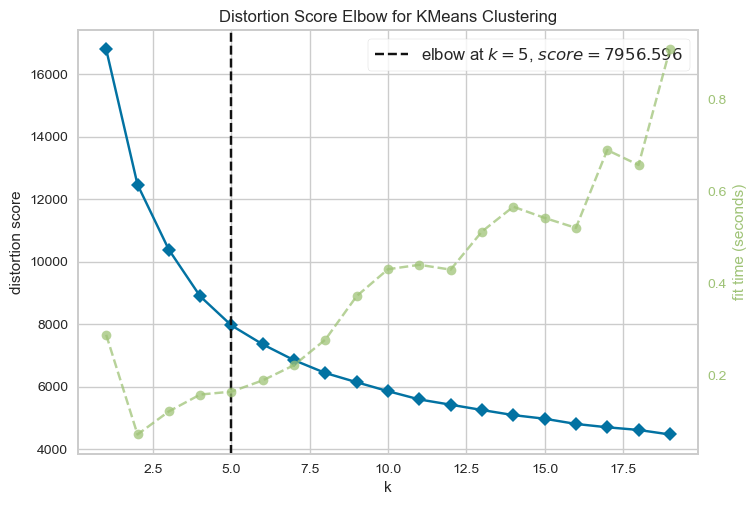

In [30]:
kmeans=KMeans()
visu=KElbowVisualizer(kmeans,k=(1,20))   
visu.fit(df_cc)
visu.poof();

* we made a smoother operation,thus giving the optimum value of k as 5.We will divide it into 5 sets..

In [78]:
kmeans_cluster = KMeans(5, random_state = 42)
kmeans_cluster.fit(df_cc)

KMeans(n_clusters=5, random_state=42)

In [79]:
y_pred_k=kmeans_cluster.fit_predict(df_cc)

In [80]:
df_cc["cluster"]=y_pred_k
df_cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster number,cluster
0,0.008275,0.345455,0.035127,0.000000,0.081428,0.000000,0.166667,0.000000,0.083333,0.00,0.0,0.048780,0.068841,0.048302,0.077066,0.000000,0.0,0,0
1,0.647889,0.672727,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.45,0.4,0.000000,0.503623,0.982075,0.592440,0.622222,0.0,2,0
2,0.504792,1.000000,0.284686,0.535617,0.000000,0.000000,1.000000,1.000000,0.000000,0.00,0.0,0.292683,0.539855,0.148894,0.346554,0.000000,0.0,4,0
3,0.337183,0.000000,0.551940,1.000000,0.000000,0.073903,0.083333,0.111111,0.000000,0.15,0.1,0.024390,0.539855,0.000000,0.172614,0.000000,0.0,0,0
4,0.165431,1.000000,0.005891,0.011084,0.000000,0.000000,0.083333,0.111111,0.000000,0.00,0.0,0.024390,0.083333,0.162362,0.135233,0.000000,0.0,3,0


In [34]:
#let's find the centers
centers=kmeans.cluster_centers_
centers

array([[0.03531883, 0.04372692, 0.12573392, 0.13941028, 0.10011452,
        0.11808718, 0.2641837 , 0.12071515, 0.16318367, 0.08467257,
        0.08279241, 0.10042866, 0.26269558, 0.21134342, 0.10240994,
        0.36965324, 0.        ],
       [0.12214   , 0.85733626, 0.28364965, 0.06865708, 0.4984432 ,
        0.05160942, 0.9109059 , 0.10146408, 0.85049444, 0.05823938,
        0.05819149, 0.4130384 , 0.22980863, 0.21519749, 0.23329949,
        0.42285142, 0.        ],
       [0.63399883, 0.88066601, 0.10343309, 0.11581586, 0.08229416,
        0.82266802, 0.21409473, 0.12268321, 0.12808926, 0.70751773,
        0.79046424, 0.10452306, 0.43975466, 0.47930218, 0.58864515,
        0.08126904, 0.        ],
       [0.27749728, 0.96563238, 0.09267041, 0.1376592 , 0.0391612 ,
        0.1408872 , 0.19319065, 0.15421586, 0.07449384, 0.19241705,
        0.17397384, 0.08264299, 0.21942761, 0.17875442, 0.30048418,
        0.03509318, 0.        ],
       [0.37208732, 0.93411907, 0.81250788, 0.831102

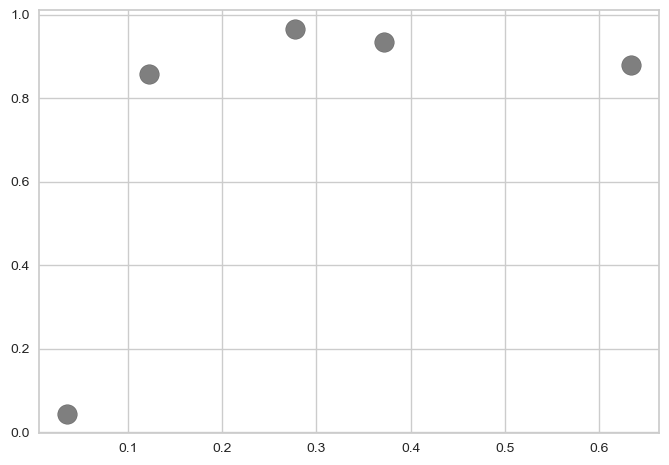

In [35]:
# Let's look at the locations of the centers
# merkezlerin konumarına bakalım

plt.scatter(centers[:,0],centers[:,1],c="black",s=200,alpha=0.5);

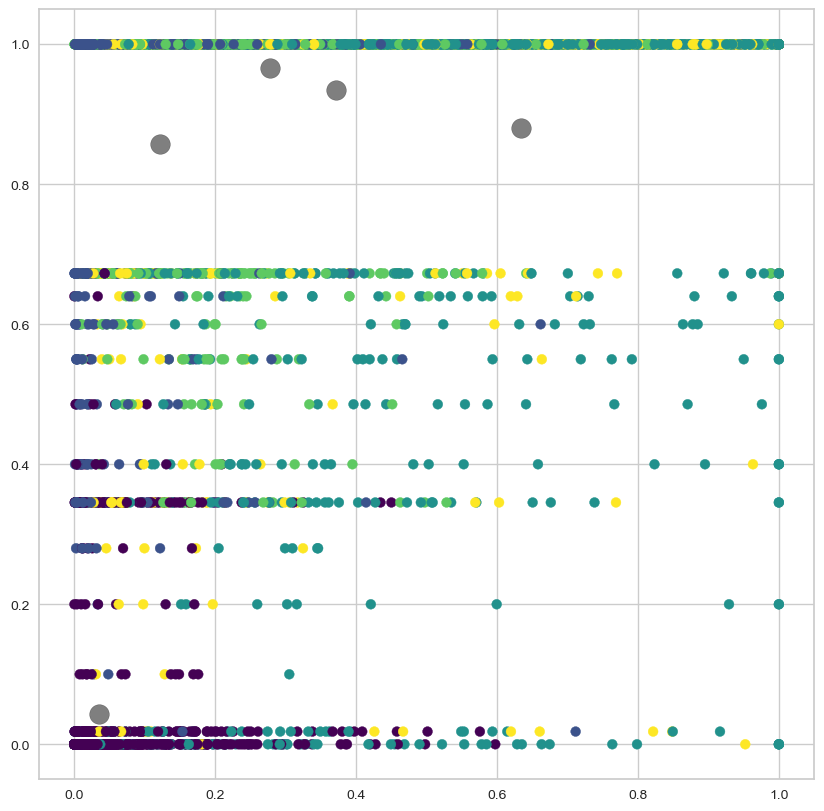

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(df_cc.iloc[:,0],df_cc.iloc[:,1],c=cluster,s=50,cmap="viridis")
plt.scatter(centers[:,0],centers[:,1],c="black",s=200,alpha=0.5);

# 4.Hierarchical Clustering

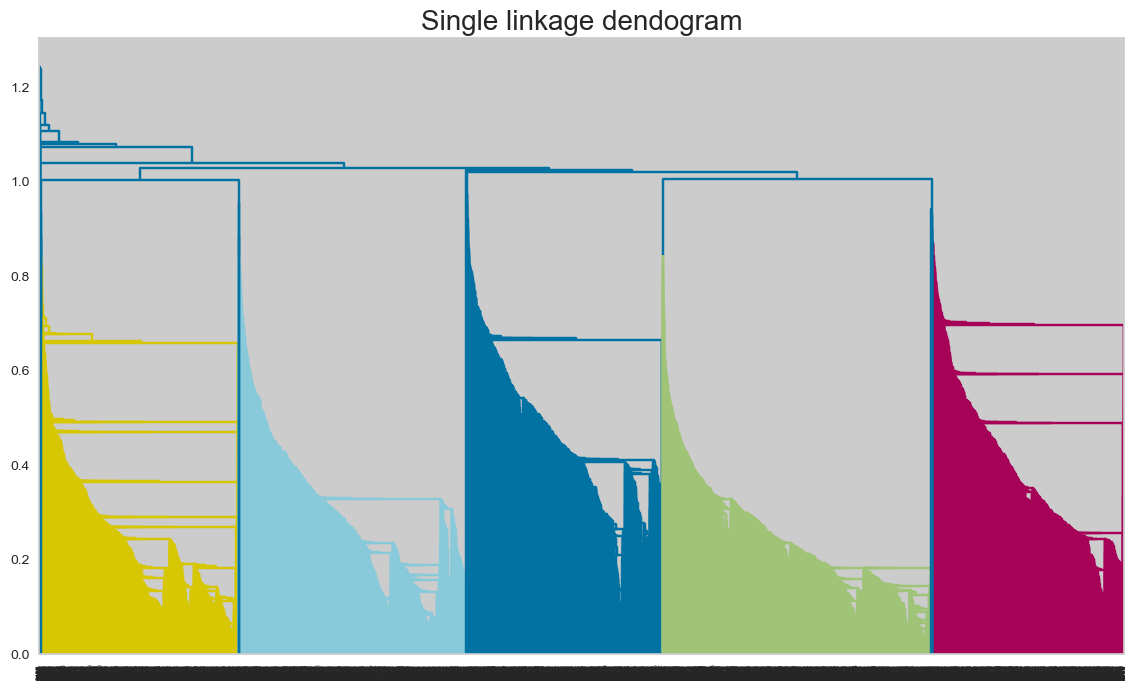

In [37]:
fig = plt.figure(figsize=(14,8))
dendogram = sch.dendrogram(sch.linkage(df_cc, method='single'))
plt.title('Single linkage dendogram',size=20)
plt.show()

In [43]:
hie_clustering_1 = AgglomerativeClustering(n_clusters=2, affinity= 'euclidean', linkage='single')

In [44]:
pred_c_1 =hie_clustering_1.fit_predict(df_cc)

In [45]:
df_cc['cluster'] =pred_c_1
df_cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster number,cluster
0,0.008275,0.345455,0.035127,0.000000,0.081428,0.000000,0.166667,0.000000,0.083333,0.00,0.0,0.048780,0.068841,0.048302,0.077066,0.000000,0.0,0,0
1,0.647889,0.672727,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.45,0.4,0.000000,0.503623,0.982075,0.592440,0.622222,0.0,2,0
2,0.504792,1.000000,0.284686,0.535617,0.000000,0.000000,1.000000,1.000000,0.000000,0.00,0.0,0.292683,0.539855,0.148894,0.346554,0.000000,0.0,4,0
3,0.337183,0.000000,0.551940,1.000000,0.000000,0.073903,0.083333,0.111111,0.000000,0.15,0.1,0.024390,0.539855,0.000000,0.172614,0.000000,0.0,0,0
4,0.165431,1.000000,0.005891,0.011084,0.000000,0.000000,0.083333,0.111111,0.000000,0.00,0.0,0.024390,0.083333,0.162362,0.135233,0.000000,0.0,3,0


In [46]:
df_cc['cluster'].value_counts()

0    8947
1       2
Name: cluster, dtype: int64

# Method : Complete

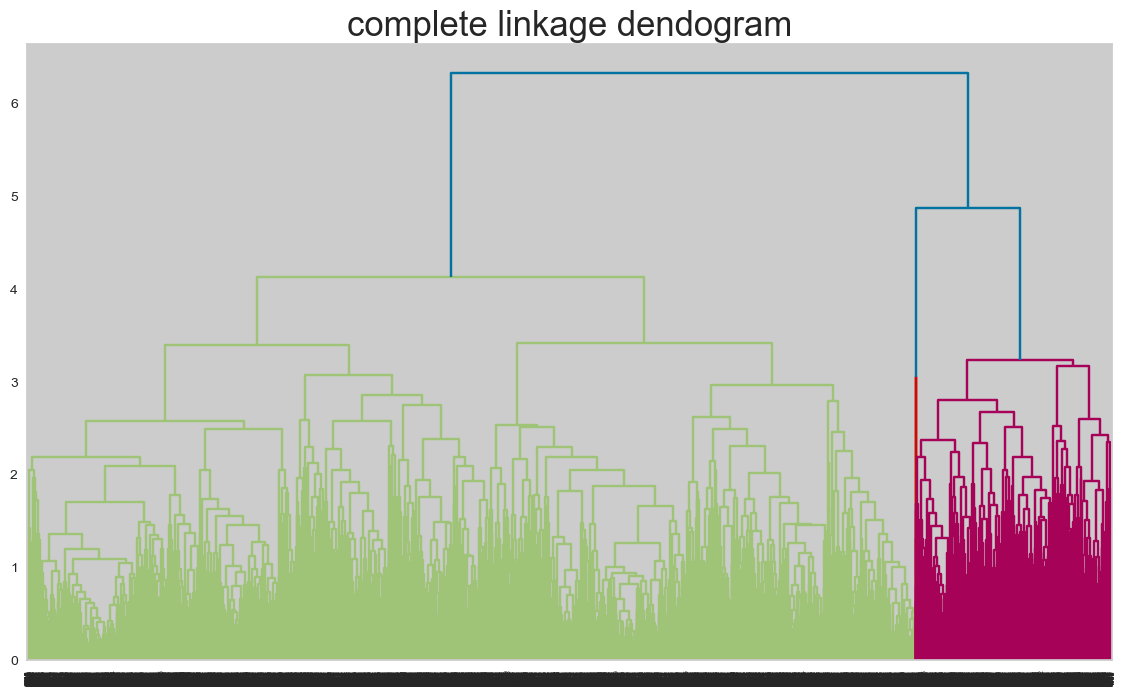

In [42]:
fig = plt.figure(figsize=(14,8))
dendogram = sch.dendrogram(sch.linkage(df_cc, method='complete'))
plt.title('complete linkage dendogram', size=25)
plt.show()

In [47]:
hie_cluster2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='complete')

In [48]:
pred_c_2 =hie_cluster2.fit_predict(df_cc)

In [49]:
df_cc['cluster']= pred_c_2
df_cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster number,cluster
0,0.008275,0.345455,0.035127,0.000000,0.081428,0.000000,0.166667,0.000000,0.083333,0.00,0.0,0.048780,0.068841,0.048302,0.077066,0.000000,0.0,0,3
1,0.647889,0.672727,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.45,0.4,0.000000,0.503623,0.982075,0.592440,0.622222,0.0,2,0
2,0.504792,1.000000,0.284686,0.535617,0.000000,0.000000,1.000000,1.000000,0.000000,0.00,0.0,0.292683,0.539855,0.148894,0.346554,0.000000,0.0,4,1
3,0.337183,0.000000,0.551940,1.000000,0.000000,0.073903,0.083333,0.111111,0.000000,0.15,0.1,0.024390,0.539855,0.000000,0.172614,0.000000,0.0,0,3
4,0.165431,1.000000,0.005891,0.011084,0.000000,0.000000,0.083333,0.111111,0.000000,0.00,0.0,0.024390,0.083333,0.162362,0.135233,0.000000,0.0,3,0


In [50]:
df_cc['cluster'].value_counts()

0    3811
2    1894
1    1625
3    1619
Name: cluster, dtype: int64

# Method : Average

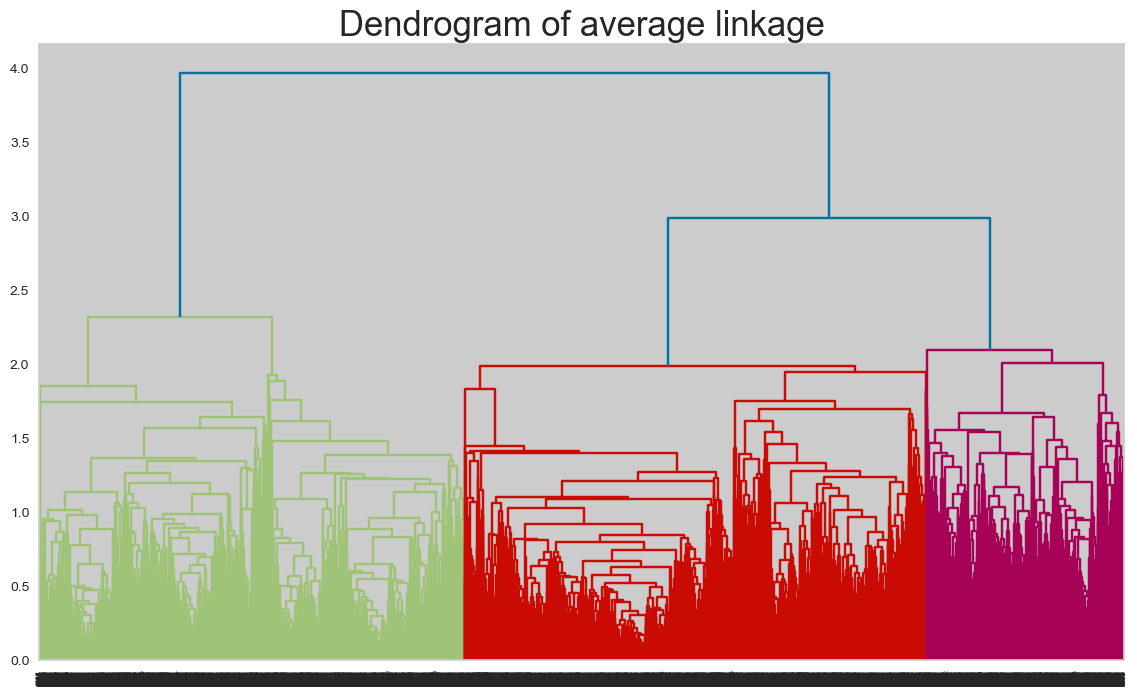

In [51]:
fig = plt.figure(figsize=(14,8))
dendogram = sch.dendrogram(sch.linkage(df_cc, method = 'average'))
plt.title('Dendrogram of average linkage', size=25)
plt.show()                 

In [52]:
hie_cluster_3 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')

In [53]:
pred_c_3 = hie_cluster_3.fit_predict(df_cc)

In [54]:
df_cc['cluster'] = pred_c_3
df_cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster number,cluster
0,0.008275,0.345455,0.035127,0.000000,0.081428,0.000000,0.166667,0.000000,0.083333,0.00,0.0,0.048780,0.068841,0.048302,0.077066,0.000000,0.0,0,1
1,0.647889,0.672727,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.45,0.4,0.000000,0.503623,0.982075,0.592440,0.622222,0.0,2,2
2,0.504792,1.000000,0.284686,0.535617,0.000000,0.000000,1.000000,1.000000,0.000000,0.00,0.0,0.292683,0.539855,0.148894,0.346554,0.000000,0.0,4,0
3,0.337183,0.000000,0.551940,1.000000,0.000000,0.073903,0.083333,0.111111,0.000000,0.15,0.1,0.024390,0.539855,0.000000,0.172614,0.000000,0.0,0,1
4,0.165431,1.000000,0.005891,0.011084,0.000000,0.000000,0.083333,0.111111,0.000000,0.00,0.0,0.024390,0.083333,0.162362,0.135233,0.000000,0.0,3,2


In [55]:
df_cc['cluster'].value_counts()

2    3811
3    1880
1    1633
0    1619
4       6
Name: cluster, dtype: int64

# Method : Ward

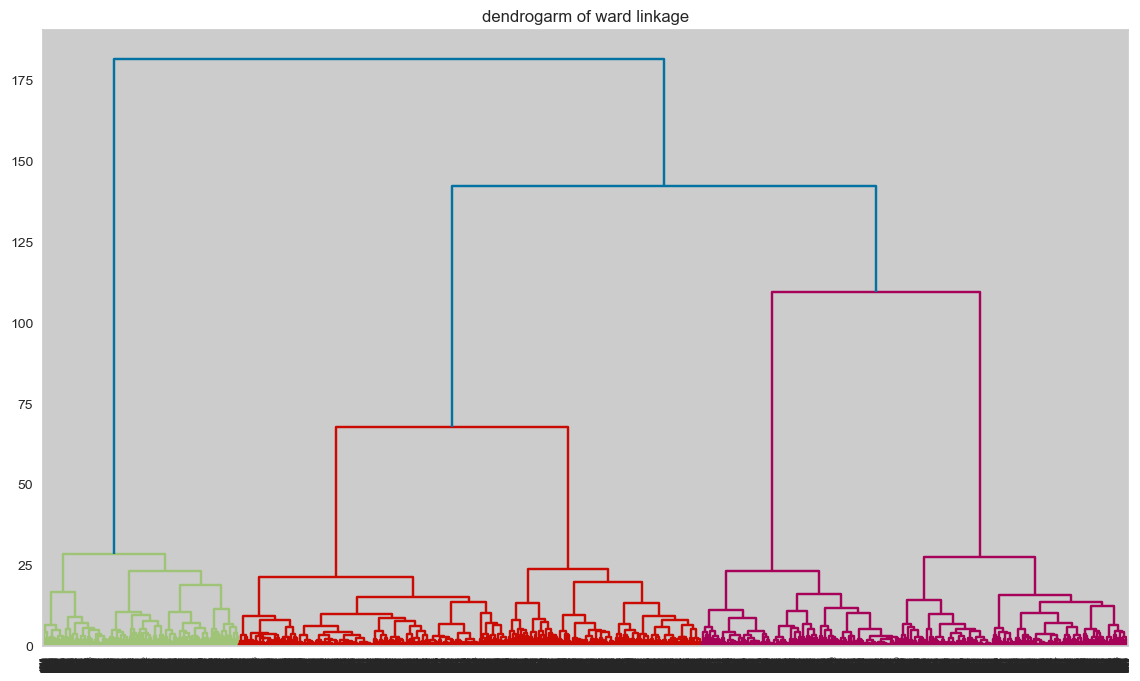

In [56]:
figure = plt.figure(figsize=(14,8))
dendrogarm = sch.dendrogram(sch.linkage(df_cc , method = 'ward'))
plt.title('dendrogarm of ward linkage')
plt.show()

In [57]:
hie_cluster4 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')

In [58]:
pred_c_4 =hie_cluster4.fit_predict(df_cc)

In [61]:
df_cc['cluster'] = pred_c_4
df_cc

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster number,cluster
0,0.008275,0.345455,0.035127,0.000000,0.081428,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,0.048780,0.068841,0.048302,0.077066,0.000000,0.0,0,0
1,0.647889,0.672727,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.450000,0.4,0.000000,0.503623,0.982075,0.592440,0.622222,0.0,2,2
2,0.504792,1.000000,0.284686,0.535617,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.292683,0.539855,0.148894,0.346554,0.000000,0.0,4,1
3,0.337183,0.000000,0.551940,1.000000,0.000000,0.073903,0.083333,0.111111,0.000000,0.150000,0.1,0.024390,0.539855,0.000000,0.172614,0.000000,0.0,0,0
4,0.165431,1.000000,0.005891,0.011084,0.000000,0.000000,0.083333,0.111111,0.000000,0.000000,0.0,0.024390,0.083333,0.162362,0.135233,0.000000,0.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.005765,1.000000,0.107192,0.000000,0.248482,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,0.146341,0.068841,0.077932,0.026998,1.000000,0.0,1,0
8946,0.003881,1.000000,0.110462,0.000000,0.256061,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,0.146341,0.068841,0.066028,0.172614,0.000000,0.0,1,0
8947,0.004734,0.399998,0.053169,0.000000,0.123251,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,0.121951,0.068841,0.019452,0.045524,0.700001,0.0,1,0
8948,0.002723,0.399998,0.000000,0.000000,0.000000,0.013129,0.000000,0.000000,0.000000,0.300001,0.2,0.000000,0.032609,0.012578,0.030793,0.700001,0.0,0,0


In [62]:
df_cc['cluster'].value_counts()

2    3817
0    3513
1    1619
Name: cluster, dtype: int64

# 5.DBSCAN Clustering

In [63]:
dbscan = DBSCAN(eps =0.3 , min_samples= 3)

In [64]:
dbscan.fit(df_cc)

DBSCAN(eps=0.3, min_samples=3)

In [68]:
pred_db = dbscan.fit_predict(df_cc)

In [69]:
df_cc['cluster'] = pred_db
df_cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster number,cluster
0,0.008275,0.345455,0.035127,0.000000,0.081428,0.000000,0.166667,0.000000,0.083333,0.00,0.0,0.048780,0.068841,0.048302,0.077066,0.000000,0.0,0,0
1,0.647889,0.672727,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.45,0.4,0.000000,0.503623,0.982075,0.592440,0.622222,0.0,2,-1
2,0.504792,1.000000,0.284686,0.535617,0.000000,0.000000,1.000000,1.000000,0.000000,0.00,0.0,0.292683,0.539855,0.148894,0.346554,0.000000,0.0,4,-1
3,0.337183,0.000000,0.551940,1.000000,0.000000,0.073903,0.083333,0.111111,0.000000,0.15,0.1,0.024390,0.539855,0.000000,0.172614,0.000000,0.0,0,-1
4,0.165431,1.000000,0.005891,0.011084,0.000000,0.000000,0.083333,0.111111,0.000000,0.00,0.0,0.024390,0.083333,0.162362,0.135233,0.000000,0.0,3,1


**Evaluating Clustering methods with the help of Silhouette Score The Silhouette Score metric calculates the goodness of the clustering techniques and it ranges from -1 to 1**

1: Means clusters are well apart from each other and clearly distinguished.

0: Means the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way

In [72]:
silhouette_SLM = (metrics.silhouette_score(df_cc,pred_c_1))
silhouette_SLM

-0.3230155512755737

In [74]:
silhouette_CLM = (metrics.silhouette_score(df_cc,pred_c_2))
silhouette_CLM

0.06893514282541317

In [75]:
silhouette_ALM = (metrics.silhouette_score(df_cc,pred_c_3))
silhouette_ALM

-0.1783052746121827

In [76]:
silhouette_cenLM = (metrics.silhouette_score(df_cc,pred_c_4))
silhouette_cenLM

0.1200665100444739

In [81]:
silhouette_KMeans = (metrics.silhouette_score(df_cc,y_pred_k))
silhouette_KMeans

0.10840686442673372

In [82]:
silhouette_DBSCAN = (metrics.silhouette_score(df_cc,pred_db))
silhouette_DBSCAN

-0.02680839978127326

In [84]:
table = {'Clustering Models' : ['HC Single Linkage', 'HC Complete Linkage', 'HC Average Linkage', 
                                'HC Centroid Linkage', 'KMeans', 'DBSCAN'], 
          'Silhouette Score' : [silhouette_SLM, silhouette_CLM, silhouette_ALM, silhouette_cenLM, 
                                silhouette_KMeans, silhouette_DBSCAN]
        }

table = pd.DataFrame(table)
table

,Clustering Models,Silhouette Score
0,HC Single Linkage,0.068935
1,HC Complete Linkage,0.068935
2,HC Average Linkage,-0.178305
3,HC Centroid Linkage,0.120067
4,KMeans,0.108407
5,DBSCAN,-0.026808


* **A score close to 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A score close to -1 indicates that the object may have been assigned to the wrong cluster.**

* **Based on these scores, the best performing clustering algorithms in this case seem to be HC Centroid Linkage and KMeans, with scores of 0.120067 and 0.108407, respectively.** 
* **HC Single Linkage and HC Complete Linkage performed similarly, with a score of 0.068935.** 
* **HC Average Linkage performed poorly, with a score of -0.178305. DBSCAN performed the worst, with a score of -0.026808.**